## 💪 Challenge
Create a report to answer your colleague's questions. Include:

1. What are the total sales for each payment method?
2. What is the average unit price for each product line?
3. Create plots to visualize findings for questions 1 and 2.
4. [Optional] Investigate further (e.g., average purchase value by client type, total purchase value by product line, etc.)
5. Summarize your findings.

## Import Important Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the dataset into pandas dataframe
sales = pd.read_csv('data/sales_data.csv')

## Reading the Data Sets

In [3]:
# check the first 5 entries of the dataframe
sales.head()

,date,warehouse,client_type,product_line,quantity,unit_price,total,payment
0,2021-06-01,Central,Retail,Miscellaneous,8,16.85,134.83,Credit card
1,2021-06-01,North,Retail,Breaking system,9,19.29,173.61,Cash
2,2021-06-01,North,Retail,Suspension & traction,8,32.93,263.45,Credit card
3,2021-06-01,North,Wholesale,Frame & body,16,37.84,605.44,Transfer
4,2021-06-01,Central,Retail,Engine,2,60.48,120.96,Credit card


In [26]:
# check the numbers of rows and columns of the dataframe
sales.shape

(1000, 10)

In [5]:
# check the general information of the dataset
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1000 non-null   object 
 1   warehouse     1000 non-null   object 
 2   client_type   1000 non-null   object 
 3   product_line  1000 non-null   object 
 4   quantity      1000 non-null   int64  
 5   unit_price    1000 non-null   float64
 6   total         1000 non-null   float64
 7   payment       1000 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 62.6+ KB


The dataset has 1000 rows and 8 columns,it has object, int and float datatype and contain no missing value

In [6]:
sales.describe()

,quantity,unit_price,total
count,1000.000000,1000.000000,1000.000000
mean,9.395000,30.322040,289.113000
std,9.659207,12.256488,345.227596
min,1.000000,10.030000,10.350000
25%,4.000000,21.085000,93.687500
50%,6.500000,28.570000,178.360000
75%,10.000000,37.917500,321.690000
max,40.000000,66.620000,2546.330000


In [7]:
# check for duplicates in the dataset
sales.duplicated().sum()

0

The sales dataset has no duplicate

In [8]:
# changing date to datetime 
sales['date'] = pd.to_datetime(sales["date"],infer_datetime_format = True)
# for year splitting
sales['year']= sales["date"].dt.year
# for month splitting
sales['month']= sales["date"].dt.month
# for day splitting
sales['day']= sales["date"].dt.day

In [9]:
sales.drop(["date"], axis = 1, inplace =True)

# DATA ANALYSIS

# Question 1: Total Sales for each Payment Method

In [10]:
# Using pivot table to calculate the sales for each payment
sales.pivot_table(index="payment", values="total",aggfunc="sum").round(0).sort_values("total", ascending=False)

,total
payment,
Transfer,159642.0
Credit card,110272.0
Cash,19199.0


In [11]:
# This is a chart, switch to the DataCamp editor to view and configure it.

,warehouse,client_type,product_line,quantity,unit_price,total,payment,year,month,day
0,Central,Retail,Miscellaneous,8,16.85,134.83,Credit card,2021,6,1
1,North,Retail,Breaking system,9,19.29,173.61,Cash,2021,6,1
2,North,Retail,Suspension & traction,8,32.93,263.45,Credit card,2021,6,1
3,North,Wholesale,Frame & body,16,37.84,605.44,Transfer,2021,6,1
4,Central,Retail,Engine,2,60.48,120.96,Credit card,2021,6,1
...,...,...,...,...,...,...,...,...,...,...
995,Central,Retail,Electrical system,9,32.87,295.83,Credit card,2021,8,28
996,West,Wholesale,Breaking system,32,10.03,320.96,Transfer,2021,8,28
997,West,Wholesale,Electrical system,12,32.80,393.64,Transfer,2021,8,28
998,North,Retail,Frame & body,5,48.25,241.23,Cash,2021,8,28


### Observation
Transfer has the highest total sales of about 159642. This implies that majority of the customers paid through transfer. 
Credit card has a total sales slightly above 11000. This amount is high but not as that of transfer.
Cash has the lowest sales value of about 19199. This implies that only few of the customers pay through cash.

# Question 2: What is the Average unit Price for each Product line?

In [12]:
sales.groupby("product_line") ["unit_price"].mean().round(0).sort_values(ascending = False)

product_line
Engine                   60.0
Frame & body             43.0
Suspension & traction    34.0
Electrical system        26.0
Miscellaneous            23.0
Breaking system          18.0
Name: unit_price, dtype: float64

In [13]:
# This is a chart, switch to the DataCamp editor to view and configure it.

,warehouse,client_type,product_line,quantity,unit_price,total,payment,year,month,day
0,Central,Retail,Miscellaneous,8,16.85,134.83,Credit card,2021,6,1
1,North,Retail,Breaking system,9,19.29,173.61,Cash,2021,6,1
2,North,Retail,Suspension & traction,8,32.93,263.45,Credit card,2021,6,1
3,North,Wholesale,Frame & body,16,37.84,605.44,Transfer,2021,6,1
4,Central,Retail,Engine,2,60.48,120.96,Credit card,2021,6,1
...,...,...,...,...,...,...,...,...,...,...
995,Central,Retail,Electrical system,9,32.87,295.83,Credit card,2021,8,28
996,West,Wholesale,Breaking system,32,10.03,320.96,Transfer,2021,8,28
997,West,Wholesale,Electrical system,12,32.80,393.64,Transfer,2021,8,28
998,North,Retail,Frame & body,5,48.25,241.23,Cash,2021,8,28


### Observation:
The Engine product line has the highest average unit price of 60.0 while breaking system has the least average unit price of 17.7

# Optional Investigation Questions

## 1. What is the average purchase value by client type

In [14]:
sales.groupby("client_type")["total"].mean().round(0)

client_type
Retail       167.0
Wholesale    710.0
Name: total, dtype: float64

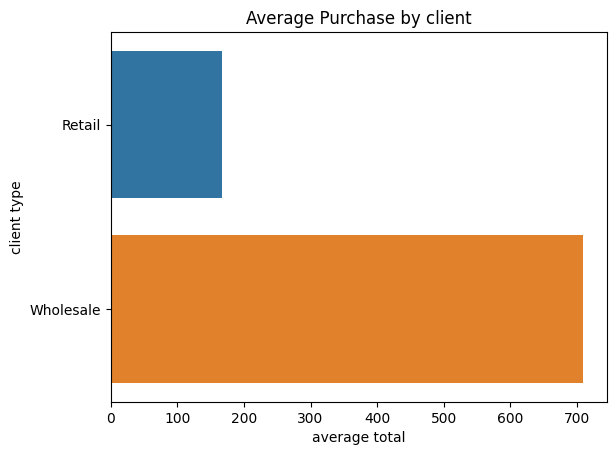

In [15]:
sns.barplot(data = sales,x='total',y ='client_type', ci=None)
plt.xlabel('average total')
plt.ylabel('client type')
plt.title('Average Purchase by client')
plt.show();

## 2. What is the total purchase value by product line?

In [16]:
sales_by_product = sales.groupby("product_line")["total"].sum().round(0).sort_values(ascending = False)
sales_by_product

product_line
Suspension & traction    73014.0
Frame & body             69025.0
Electrical system        43613.0
Breaking system          38350.0
Engine                   37945.0
Miscellaneous            27166.0
Name: total, dtype: float64

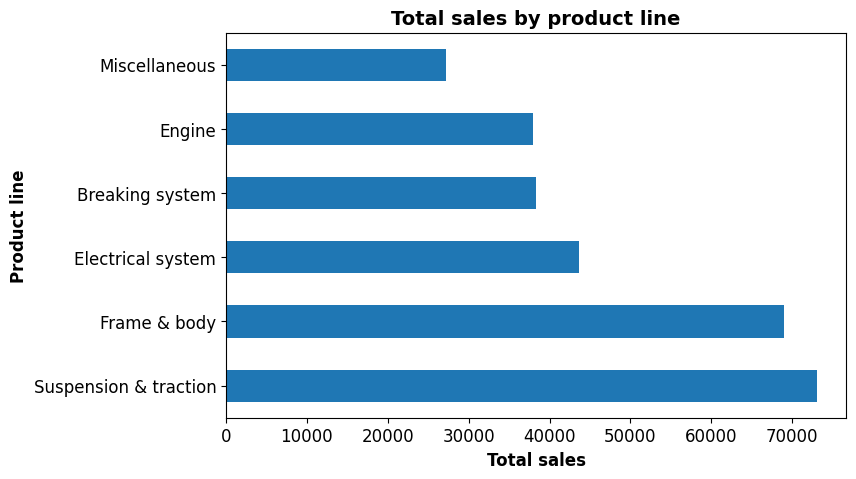

In [17]:
# plot a matplotlib barchart
plt.figure(figsize=(8,5))
sales_by_product.plot(kind='barh',fontsize=12)
plt.xlabel('Total sales', weight = 'bold', fontsize=12)
plt.ylabel('Product line', weight = 'bold', fontsize=12)
plt.title("Total sales by product line",weight = 'bold', fontsize=14);

### Observation: 
The product line with the highest quantity sold is suspension & traction, at more than 2 times the number of orders for engines and breaking system. This leads us to consider if there is a significant correlation between total sales and unit price, both across and within the product lines. This is a question to be explored later.

The distribution of quantity of orders for each product line is similar to the distribution of quantity of orders for all product lines, and there are no significant anomalies or notable patterns.

 ## 3. What is the total quantity for each warehouse?

In [18]:
sales.groupby('warehouse')[['quantity']].sum()

,quantity
warehouse,
Central,4527
North,3254
West,1614


In [19]:
# This is a chart, switch to the DataCamp editor to view and configure it.

,warehouse,client_type,product_line,quantity,unit_price,total,payment,year,month,day
0,Central,Retail,Miscellaneous,8,16.85,134.83,Credit card,2021,6,1
1,North,Retail,Breaking system,9,19.29,173.61,Cash,2021,6,1
2,North,Retail,Suspension & traction,8,32.93,263.45,Credit card,2021,6,1
3,North,Wholesale,Frame & body,16,37.84,605.44,Transfer,2021,6,1
4,Central,Retail,Engine,2,60.48,120.96,Credit card,2021,6,1
...,...,...,...,...,...,...,...,...,...,...
995,Central,Retail,Electrical system,9,32.87,295.83,Credit card,2021,8,28
996,West,Wholesale,Breaking system,32,10.03,320.96,Transfer,2021,8,28
997,West,Wholesale,Electrical system,12,32.80,393.64,Transfer,2021,8,28
998,North,Retail,Frame & body,5,48.25,241.23,Cash,2021,8,28


### Observation
Central warehouse has the highest quantity with a value of 4527 for both wholesale and retail, followed by the North with 3254 and West has the lowest quantity of 1614.


## 4. What is the total sales and quantity for each month?

In [20]:

sales.pivot_table(index="month", values=["total", "quantity"], aggfunc="sum").round(0).sort_values("quantity", ascending= False)

,quantity,total
month,,
8,3191,100245.0
7,3160,93548.0
6,3044,95320.0


### Observation
There was more sales and quantity of products in August than the other two months.


## 5. What is the percentage of client types?

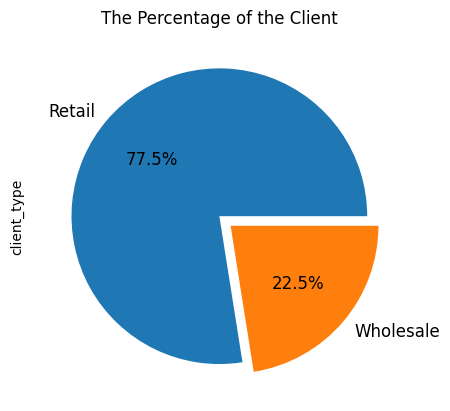

In [21]:
sales['client_type'].value_counts().plot(kind="pie", fontsize=12, autopct="%1.1f%%", explode=[0.0, 0.1])
plt.title("The Percentage of the Client")
plt.show()

## 6. What is the Total sales of product line in warehouse?

In [22]:
# using pivot table
sales_group = sales.pivot_table(index="product_line", columns="warehouse", values="total", aggfunc="sum").round(0)
sales_group

warehouse,Central,North,West
product_line,,,
Breaking system,17793.0,10588.0,9969.0
Electrical system,21995.0,15247.0,6371.0
Engine,27263.0,7237.0,3446.0
Frame & body,30041.0,28398.0,10586.0
Miscellaneous,12221.0,8619.0,6326.0
Suspension & traction,32671.0,30115.0,10228.0


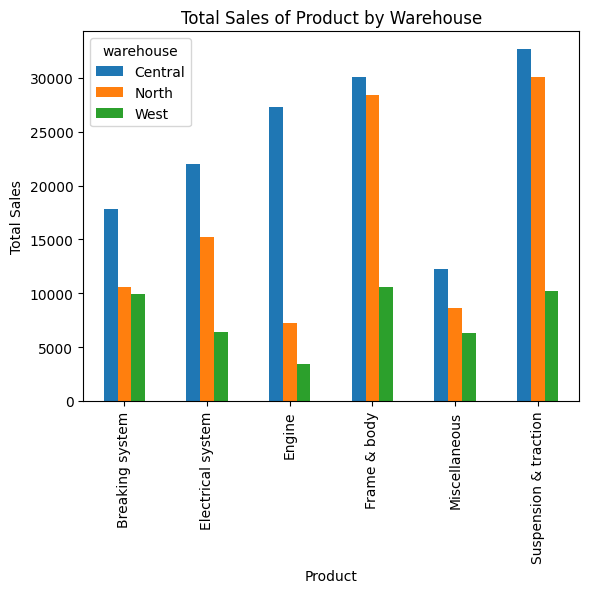

In [23]:
sales_group.plot(kind="bar")
plt.xlabel("Product")
plt.ylabel("Total Sales")
plt.title("Total Sales of Product by Warehouse")
plt.show()

### Observation:
The Central warehouse had the highest across all product line while the West had the least across all product lines

## 7. correlation between total sales and unit price

In [24]:
sales["unit_price"].corr(sales["total"])

0.37294227962360554

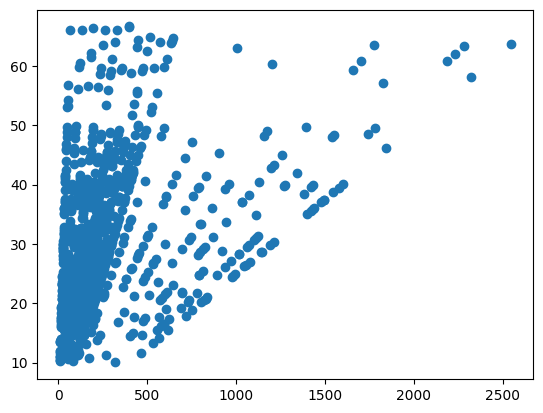

In [25]:
plt.scatter(sales['total'],sales['unit_price'])
plt.show();

### Observation:
There is positive relationship between total sales and the unit price i.e the higher the unit price, the higher the total sales.

# Summary:

### Warehouse in the West has the least amount of quantity while Central Warehouse is    generating almost half of the revenue for the firm.
### There is a positive relationship between the total sales and the unit price.
###  Purchases are mostly paid by Transfer.
### Payment by credit card is almost as important.
### Cash plays a small role.
### The Engine has the highest average unit price of (60.0) while breaking system (18.0) is the least.
### Looking at the sales numbers, one can conclude that the Central warehouse scores the highest sales and the North warehouse comes second. The West warehouse sales are about a third of the Central warehouses sales.
